# The Power Method

Given a matrix $A$, in order to compute its eigenvalues we can use the Python function eig, defined in the linear algebra class of NumPy library. The command numpy.linalg.eig(A) gives two outputs: an array object containing the eigenvalues  of the matrix $A$ and a bidmensional array (a matrix) containing the correspoding eigenvectors.

For example, let us compute the eigenvalues for the following matrices $A$ and $B$:

$$
A = \left[\begin{array}{ccc}
1&2&3\\
1&2&7\\
1&3&5\\
\end{array}\right]
$$

$$
B = \left[ \begin{array}{cc}
1&-1\\
1&1\\
\end{array}\right]
$$


In [1]:
import numpy as np 

In [80]:
A = np.array([[1,2,3],[1,2,7],[1,3,5]])

#In l we find the eigenvalues of A, in v we find the corresponding eigenvectors
l,v = np.linalg.eig(A)

print('eigenvalues of A', l)
print('matrix containing the corresponding eigenvctors\n ',v )

eigenvalues of A [ 8.95513156  0.34386002 -1.29899158]
matrix containing the corresponding eigenvctors
  [[ 0.40249394  0.97995133  0.27697554]
 [ 0.67748344 -0.1728427  -0.8838416 ]
 [ 0.61564179 -0.09909994  0.37697292]]


In [4]:
B = np.array([[1,-1],[1,1]])
l_B,v_B = np.linalg.eig(B)
print('eigenvalues of B', l_B)
print('matrix of the corresponding eigenvectors \n', v_B)

eigenvalues of B [1.+1.j 1.-1.j]
matrix of the corresponding eigenvectors 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


Comments: we notice that $A\in \mathbb{R}^{3\times 3}$ has all real eigenvalues. The matrix $B\in \mathbb{R}^{2\times2}$ has only complex eigenvalues. 

We use the power method to compute the absolute dominant eigenvalue $\lambda_1$ for the matrix $A$. Looking at the values we just computed via the Python function eig, we notice that the sought $\lambda_1\approx 9$.

Let us write a function for the power method algorithm. As input we provide a vector $u_0$ freely chosen, the matrix $A$, a tolerance specified by the user and a maximum number of iterations. 
For this version we are going to use an estimate of the absolute error, together with the maximum number of iteration as a stoppin criterion. 

$$
err := |\lambda_{k+1} - \lambda_k|
$$

This variable "err" contains the absolute value of the difference between two successive approximation of $\lambda_1$ obtained at the $k$-th iteration and at the $(k+1)$-th iteration, respectively. 

In [2]:
def Power_Met(u0,A,tol,it_max):
    n_it = 0
    u0 = np.dot(A,u0) #iterative algorithm
    lam0 = np.dot(u0.T , np.dot(A,u0))/(np.dot(u0.T,u0))
    
    #We collect all the lambda_k in a list 
    approx = []   
    approx.append(lam0)
    
    #We use a list also to store the error estimates at every iteration
    err = []
    err.append(1)
    
    while((err[-1]>tol) & (n_it <it_max) ):
        u0 = np.dot(A,u0)
        lam = np.dot(u0.T , np.dot(A,u0))/(np.dot(u0.T,u0))
        approx.append(lam)
        err.append(abs(lam-lam0))
        lam0 = lam
        n_it = n_it+1
        
    return lam,u0,n_it,err, approx

In [105]:
[lam,u0,n_it,err, approx] = Power_Met(np.array([1,1,1]),A,1e-4,100)

print('Last computed value', lam)
print('Total number of iterations', n_it)
print('Corresponding computed eigenvector', u0)
print('Error at the last step ', err[-1])


Last computed value -2.9618228835636904
Total number of iterations 100
Corresponding computed eigenvector [1402790974 2032990386  874434785]
Error at the last step  2.8315077450423813


The last computed value, that should be a rather good approximation for $\lambda_1$, is obviusly incorrect! Let us do a plot to better see the trend of the computed $\lambda_k$:

In [3]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Standard Power Method')

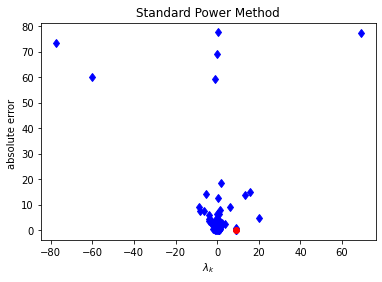

In [106]:
#We plot in blue the lambda_k and in red the "right" value

plt.plot(approx,err,'db',l[0],0,'or')
plt.xlabel('$\lambda_k$')
plt.ylabel('absolute error ')# It is infact an estimate of the absolute error
plt.title('Standard Power Method')

The plot is still not that clear, although it is evident an oscillating behaviour of the error. In order to gain even more insight about the problem, we can plot the error vs the number of iteration by using a semilogarithmic scale. 

Text(0.5, 1.0, 'Error behaviour')

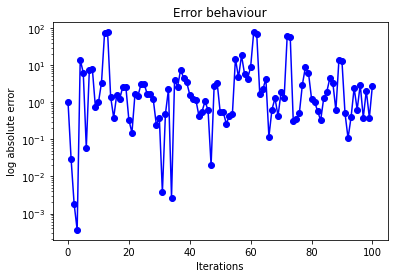

In [10]:
plt.semilogy(np.linspace(0,n_it,n_it+1),err,'-ob')
plt.xlabel('Iterations')
plt.ylabel('log absolute error')
plt.title('Error behaviour')

From the last plot there are really no doubts: the error is badly oscillating. There are picks of order of magnitude $10^2$, which clearly means, the method is not converging! The reason behind this behaviour must be search into "numerics". In order to have a stable algorithm we should use the "normalization" step. Let us try then to normalize the sequence of vectors $u_k$ at every step and then analyse the results. 

In [4]:
def Power_Met_Norm(u0,A,tol,it_max):
    n_it = 1
    
    y0 = u0/np.linalg.norm(u0)
    
    zk = np.dot(A,y0)/np.linalg.norm(np.dot(A,y0))  #iterative algorithm
    lam0 = np.dot(zk.T , np.dot(A,zk))/(np.dot(zk.T,zk))
    
    #We collect all the lambda_k in a list 
    approx = []
    approx.append(lam0)
    
    #We use a list also to store the error estimates at every iteration
    err = []
    err.append(1)
    
    while((err[-1]>tol) & (n_it <it_max) ):
        zk = np.dot(A,zk)/np.linalg.norm(np.dot(A,zk))
        lam = np.dot(zk.T , np.dot(A,zk))/(np.dot(zk.T,zk))
        approx.append(lam)
        err.append(abs(lam-lam0))
        lam0 = lam
        n_it = n_it+1
        
    return lam,zk,n_it-1,err, approx

In [87]:
[lamN,uN,n_itN,errN, approxN] = Power_Met_Norm(np.array([1,1,1]),A,1e-4,100)

print('Last computed value', lamN)
print('Number of total iterations', n_itN)
print('Corresponding computed eigenvector ', uN)
print('last computed error ', errN[-1])


Last computed value 8.95512525578014
Number of total iterations 4
Corresponding computed eigenvector  [0.40249305 0.67748514 0.61564051]
last computed error  4.869403356799751e-05


Now, with only $4$ iteration the method converges to the sought $\lambda_1$  with accuracy $10^{-5}$. Let us plot again the error behaviour, by using a semilogarithmic scale:

Text(0.5, 1.0, 'Error behaviour')

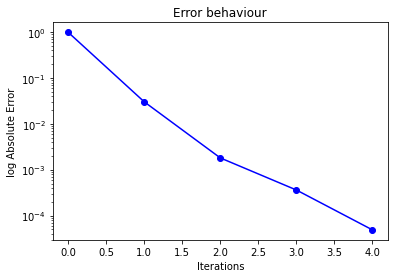

In [102]:
plt.semilogy(np.linspace(0,n_itN,n_itN+1),errN,'-ob')
plt.xlabel('Iterations')
plt.ylabel('log Absolute Error')
plt.title('Error behaviour')

# Page-Ranking

Let us consider the following simplified version of the net

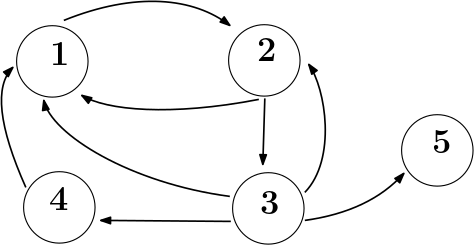

We notice that we have 5 web pages, but we also have a so called dangling node, which is page 5. 

- As first thing, we construct the hyperlink matrix H:

$$
H = \left[\begin{array}{ccccc}
0&1/2&1/4&1&0\\
1&0&1/4&0&0\\
0&1/2&0&0&0\\
0&0&1/4&0&0\\
0&0&1/4&0&0\\
\end{array}\right]
$$

- As a second step we consruct the matrix S, where we replace every zero column vector in H with a vector having as entries $1/n$, with $n$ denoting the number of total web-pages

$$
S = \left[\begin{array}{ccccc}
0&1/2&1/4&1&1/5\\
1&0&1/4&0&1/5\\
0&1/2&0&0&1/5\\
0&0&1/4&0&1/5\\
0&0&1/4&0&1/5\\
\end{array}\right]
$$

-In order to obtain a primitive and irreducible matrix, we need to construct the Google matrix G: 

$$
G = \alpha S +\frac{(1-\alpha)}{n}{\bf 1}
$$

where $\alpha$ is chosen as $0.85$ and ${\bf 1}$ denotes a $n\times n$ matrix filled with ones. 

In [9]:
#S = np.array([[0,1/2,1/4,1,1/5],[1,0,1/4,0,1/5],[0,1/2,0,0,1/5],[0,0,1/4,0,1/5],[0,0,1/4,0,1/5]])
#print('S matrix\n ', S)

S = np.array([[0,1/5,1/3,1/5,1/4],[1/3,1/5,1/3,1/5,1/4],[1/3,1/5,0,1/5,1/4],[1/3,1/5,0,1/5,1/4],[0,1/5,1/3,1/5,0]])
print('S matrix\n ', S)

alpha = 0.85
n = 5

G = alpha*S + (1-alpha)/n*np.ones([5,5])
print('\n Google matrix G \n', G)

S matrix
  [[0.         0.2        0.33333333 0.2        0.25      ]
 [0.33333333 0.2        0.33333333 0.2        0.25      ]
 [0.33333333 0.2        0.         0.2        0.25      ]
 [0.33333333 0.2        0.         0.2        0.25      ]
 [0.         0.2        0.33333333 0.2        0.        ]]

 Google matrix G 
 [[0.03       0.2        0.31333333 0.2        0.2425    ]
 [0.31333333 0.2        0.31333333 0.2        0.2425    ]
 [0.31333333 0.2        0.03       0.2        0.2425    ]
 [0.31333333 0.2        0.03       0.2        0.2425    ]
 [0.03       0.2        0.31333333 0.2        0.03      ]]


In the simplified web model we would like to compute the ranking of the 5 pages. To this end we need the power method which computes the corresponding eigenvector of the eigenvalue $\lambda=1$.
Hence we write a simplified version of the function Power_Met_Norm to accomplish this task:

In [7]:
def Page_Rank(u0,A,tol,it_max):
    n_it = 1

    y0 = u0/np.linalg.norm(u0)
    
    zk = np.dot(A,y0)/np.linalg.norm(np.dot(A,y0))  #iterative algorithm
   
    #We use a list also to store the error estimates at every iteration
    err = []
    err.append(1)
    
    while((err[-1]>tol) & (n_it <it_max) ):
        temp = zk
        zk = np.dot(A,zk)/np.linalg.norm(np.dot(A,zk))
        err.append(np.linalg.norm(temp-zk))
        n_it = n_it+1
        
    return zk,n_it-1,err

In [10]:
z,n_it,err = Page_Rank(np.array([1,1,1,1,1]), G, 1e-5,100)
print('Final computed zk \n', z)
print('Total numebr of iteration', n_it)
print('Final accuracy',err[-1])

Final computed zk 
 [0.43326424 0.55602227 0.43326424 0.43326424 0.35733111]
Total numebr of iteration 6
Final accuracy 1.71766792597179e-06
